
**Εισαγωγή Πακέτων**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score

**1. Συλλογή Δεδομένων**

---



Tο σύνολο δεδομένων αποτελείται απο καθημερινές μετεωρολογικές μετρήσεις 10 ετών από διάφορες πόλεις της Αυστραλίας και μπορεί να βρεθεί στον ακόλουθο σύνδεσμο:

https://datasetsearch.research.google.com/search?src=0&query=weather%20prediction&docid=L2cvMTF0ZGh3cGo1cw%3D%3D

Οι ημερήσιες προβλέψεις αντλήθηκαν από πολυάριθμους μετεωρολογικούς σταθμούς που είναι προσβάσιμες από τη διεύθυνση: http://www.bom.gov.au/climate/data και http://www.bom.gov.au/climate/dwo/.

Ένα παράδειγμα μετεωρολογικών προβλέψεων για την πόλη της Καμπέρας βρίσκεται στον ακόλουθο σύνδεσμο: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

Σκοπός της διπλωματικής εργασίας είναι η συγκριτική μελέτη ταξινομητών για την πρόβλεψη της βροχόπτωσης στη μεταβλητή-στόχο RainTomorrow (που παίρνει τιμές '0' ή '1') μέσω της βιβλιοθήκης scikit-learn και του WEKA.



Συγκεκρίμένα το σύνολο δεδομένων αποτελείται από τις εξής στήλες:

1.   **Location** - To όνομα της πόλης στην Αυστραλία.
2.   **MinTemp** - Η ελάχιστη θερμοκρασία τη συγκεκριμένη μέρα (βαθμοί Κελσίου).
3. **MaxTemp** - Η μέγιστη θερμοκρασία τη συγκεκριμένη μέρα (βαθμοί Κελσίου).
4. **Rainfall** - Βροχόπτωση κατά τη διάρκεια μιας συγκεκριμένης ημέρας. (χιλιοστά)
5. **Evaporation** - Εξάτμηση κατά τη διάρκεια μιας συγκεκριμένης ημέρας. (χιλιοστά)
6. **Sunshine** - Ηλιοφάνεια κατά τη διάρκεια μιας συγκεκριμένης ημέρας. (ώρες)
7. **WindGusDir** - Η κατεύθυνση της ισχυρότερης ριπής κατά τη διάρκεια μιας συγκεκριμένης ημέρας. (16 σημεία πυξίδας)
8. **WindGuSpeed** - Ταχύτητα της ισχυρότερης ριπής κατά τη διάρκεια μιας συγκεκριμένης ημέρας. (χιλιόμετρα ανά ώρα)
9. **WindDir9am** - Η κατεύθυνση του ανέμου για 10 λεπτά πριν από τις 9 π.μ.(σημεία πυξίδας)
10. **WindDir3pm** - Η κατεύθυνση του ανέμου για 10 λεπτά πριν από τις 3 μ.μ. (σημεία πυξίδας)
11. **WindSpeed9am** - Ταχύτητα του ανέμου για 10 λεπτά πριν από τις 9 π.μ. (χιλιόμετρα ανά ώρα)
12. **WindSpeed3pm** - Ταχύτητα του ανέμου για 10 λεπτά πριν από τις 3 μ.μ. (χιλιόμετρα ανά ώρα)
13. **Humidity9am** - Η υγρασία του ανέμου στις 9 π.μ. (%)
14. **Humidity3pm** - Η υγρασία του ανέμου στις 3 μ.μ. (%)
15. **Pressure9am** - Ατμοσφαιρική πίεση στις 9 π.μ. (εκτοπασκάλς)
16. **Pressure3pm** - Ατμοσφαιρική πίεση στις 3 μ.μ. (εκτοπασκάλς)
17. **Cloud9am** - Συννεφιά του ουρανού στις 9 π.μ. (όγδοα)
18. **Cloud3pm** - Συννεφιά του ουρανού στις 3 μ.μ. (όγδοα)
19. **Temp9am** - Η θερμοκρασία στις 9 π.μ. (βαθμοί Κελσίου)
20. **Temp3pm** - Η θερμοκρασία στις 3 μ.μ. (βαθμοί Κελσίου)
21. **RainToday** - 'Ναι' αν η σημερινή μέρα είναι βροχερή, διαφορετικά 'Όχι'.
22. **RainTomorrow** - '1' αν η σημερινή μέρα είναι βροχερή, διαφορετικά '0'.















In [ ]:
data = pd.read_csv("weather_data.csv")

In [ ]:
data.shape

(99516, 23)

In [ ]:
data

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,Row101816,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,0
99512,Row101817,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0
99513,Row101818,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0
99514,Row101819,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,99073.0,12.176266,6.390882,-8.5,7.6,12.0,16.8,33.9
MaxTemp,99286.0,23.218513,7.115072,-4.1,17.9,22.6,28.2,48.1
Rainfall,98537.0,2.353024,8.487866,0.0,0.0,0.0,0.8,371.0
Evaporation,56985.0,5.461320,4.162490,0.0,2.6,4.8,7.4,86.2
Sunshine,52199.0,7.615090,3.783008,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,93036.0,39.976966,13.581524,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,98581.0,14.004849,8.902323,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,97681.0,18.650464,8.801827,0.0,13.0,19.0,24.0,87.0
Humidity9am,98283.0,68.866376,19.074951,0.0,57.0,70.0,83.0,100.0
Humidity3pm,97010.0,51.433296,20.777616,0.0,37.0,52.0,65.0,100.0


**1.1 Ιστογράμματα**

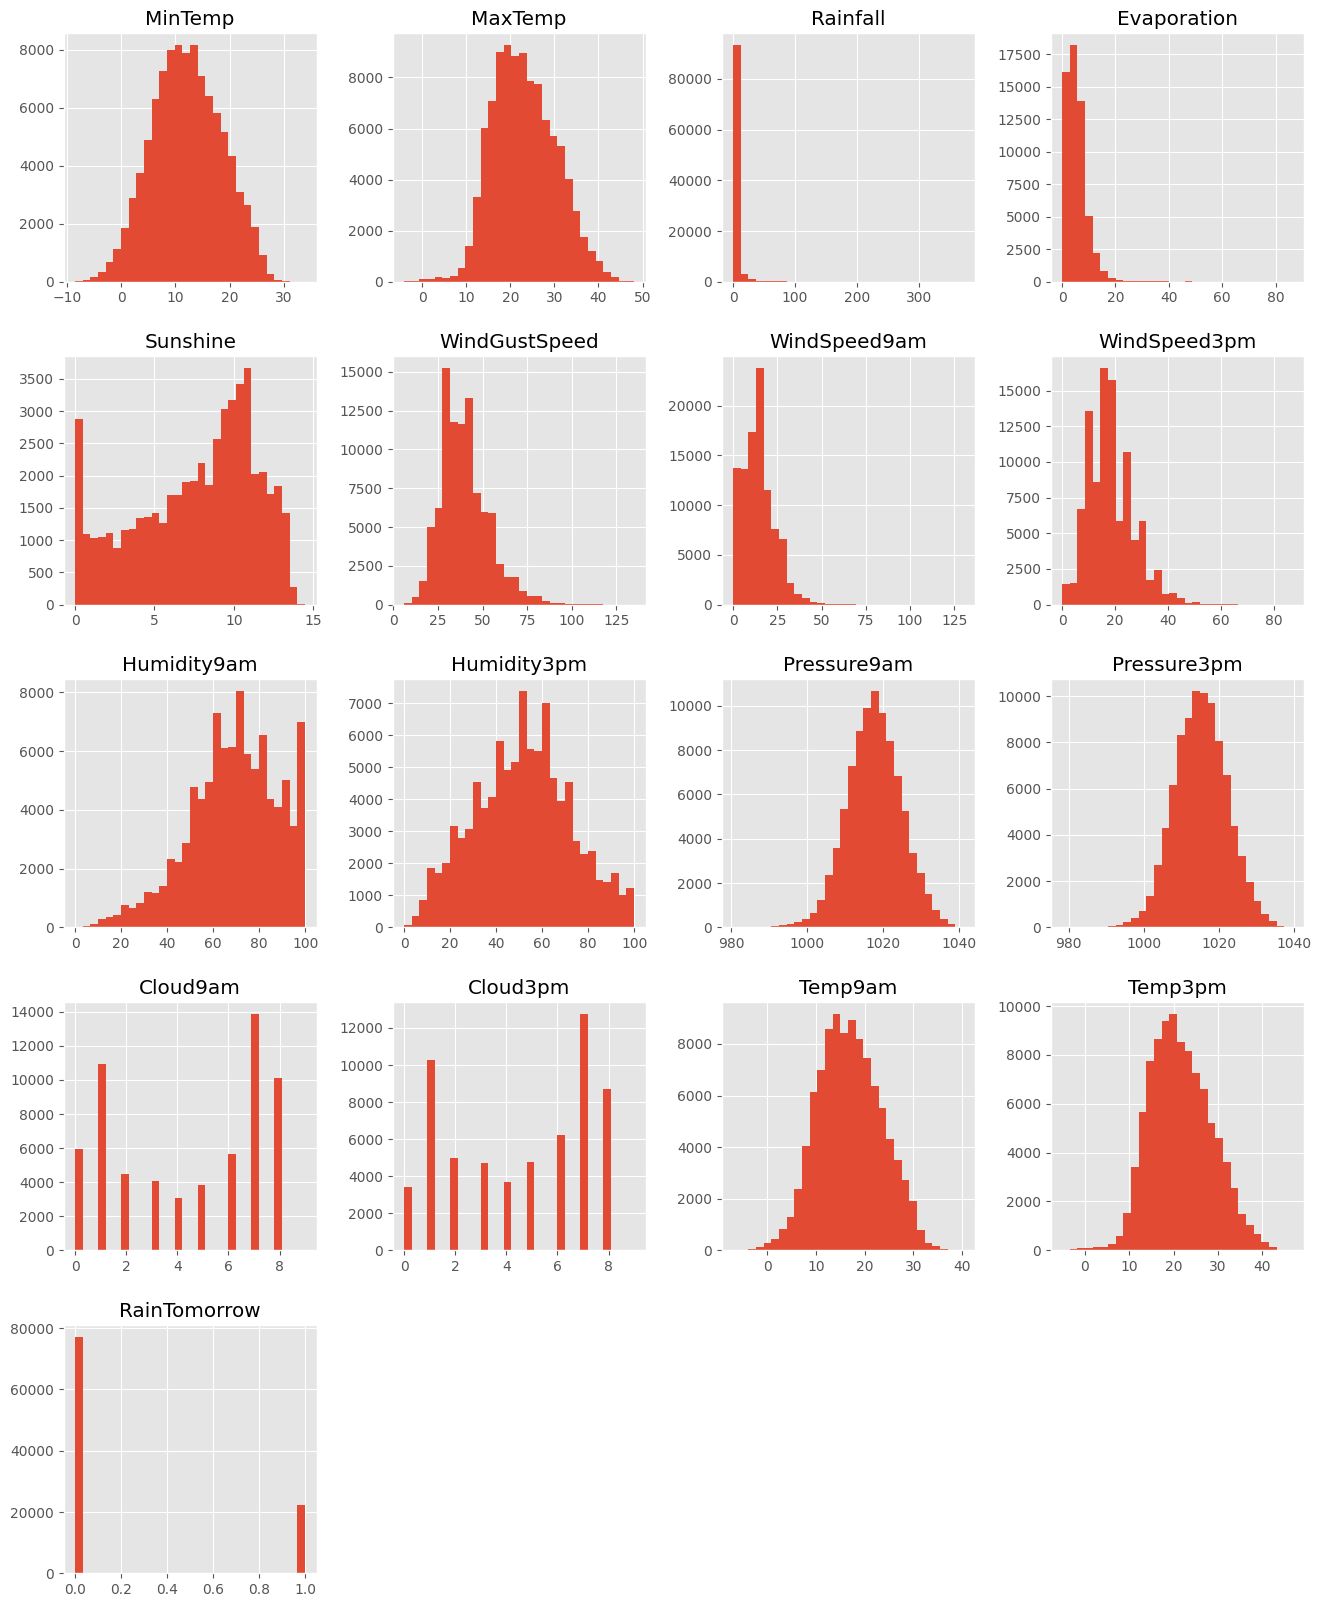

In [ ]:
hists= data.hist(figsize=(16, 20), bins = 30)

**1.2 Πίνακας Συσχέτισης**

Όσο πιο σκούρο είναι το χρώμα τόσο πιο έντονη θετική συσχέτιση έχουμε. Για παράδειγμα στον πίνακα βλέπουμε ότι η ελάχιστη θερμοκρασία κατά τη διάρκεια της ημέρας (MinTemp) με την ελάχιστη θερμοκρασία στις 9 π.μ (Temp9am) να έχουν (μεγάλη) συσχέτιση 0.9 που παρουσιάζεται με σκούρο κόκκινο χρώμα. Αντίστοιχα όσο πιο λευκή είναι η απόχρωση του κόκκινου τόσο πιο αρνητική είναι η συσχέτιση. Για παράδειγμα, η υγρασία στις 3 μ.μ (Humidity3pm) έχει (αρνητική) συσχέτιση -0.55 με τη θερμοκρασία (Temp3pm) που παρουσιάζεται με λευκό χρώμα. Αυτό είναι λογικό καθώς όσο μεγαλύτερη θερμοκρασία έχουμε τόσο λιγότερη υγρασία υπάρχει.

<ipython-input-25-433c548e7749>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


<Axes: >

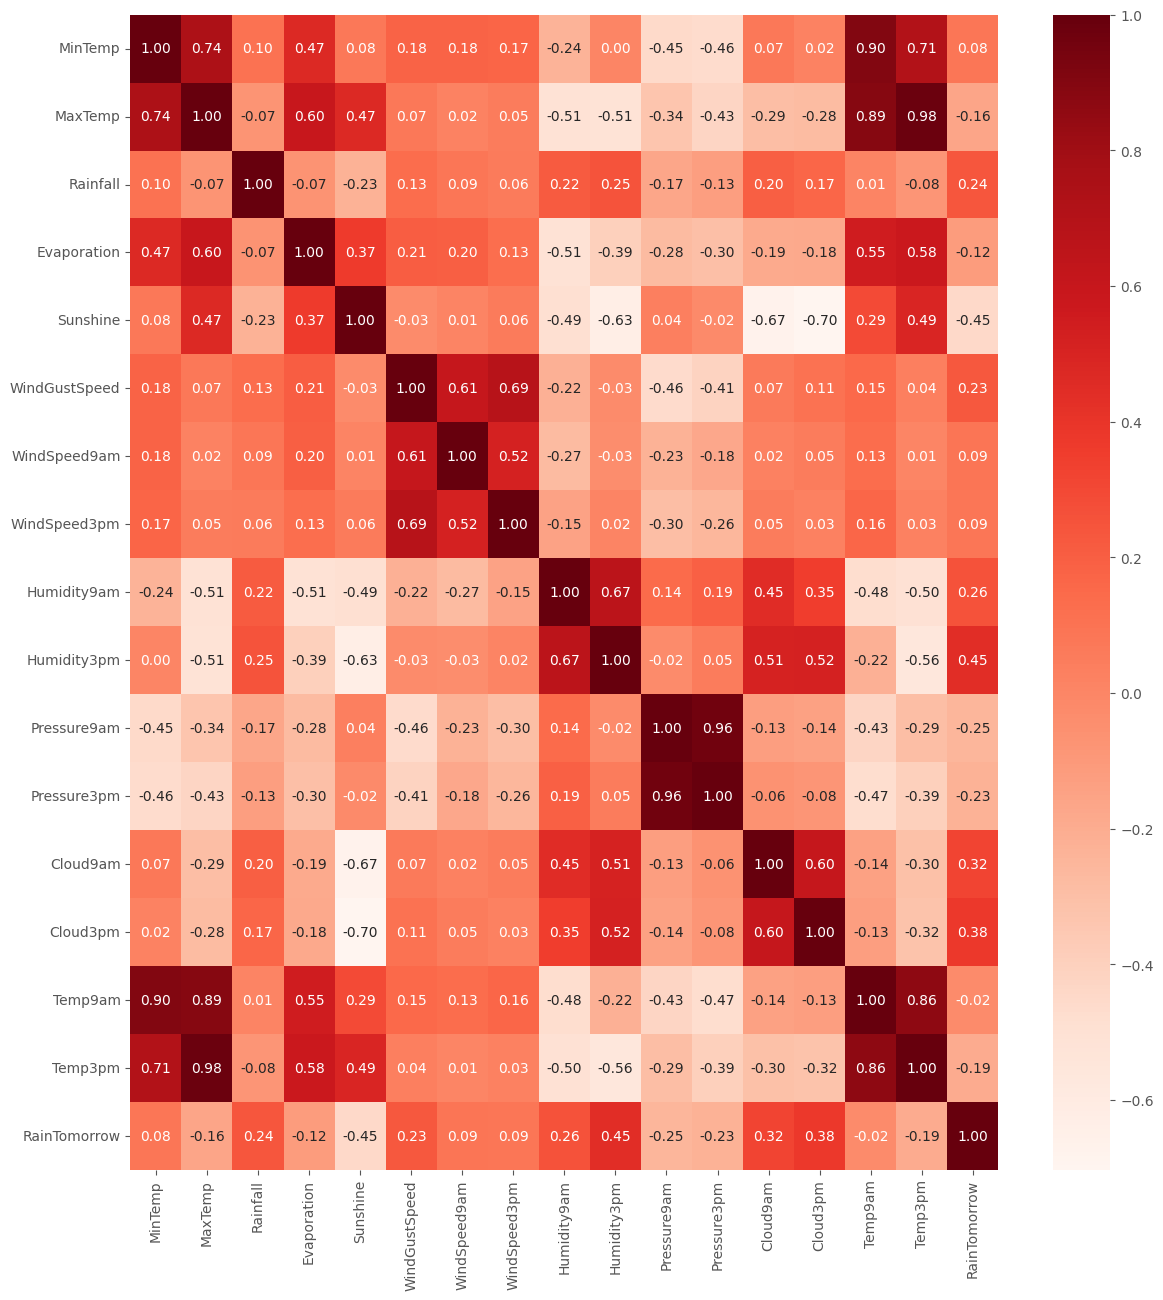

In [ ]:
plt.figure(figsize=(14,15))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,fmt='.2f')

**2. Προ-επεξεργασία Δεδομένων**

---



In [ ]:
data.drop(columns='row ID', inplace=True)

In [ ]:
total = data.isnull().sum()
percent = (data.isnull().sum() / data.isnull().count()) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [ ]:
missing_data


,Total,Percent
Location,0,0.000000
MinTemp,443,0.445155
MaxTemp,230,0.231119
Rainfall,979,0.983761
Evaporation,42531,42.737851
Sunshine,47317,47.547128
WindGustDir,6521,6.552715
WindGustSpeed,6480,6.511516
WindDir9am,7006,7.040074
WindDir3pm,2648,2.660879


In [ ]:
data.drop(columns=['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'], inplace=True)

In [ ]:
data['MinTemp']=data['MinTemp'].fillna(round(data['MinTemp'].mean(), 3))
data['MaxTemp']=data['MaxTemp'].fillna(round(data['MaxTemp'].mean(), 3))
data['Rainfall']=data['Rainfall'].fillna(round(data['Rainfall'].mean(), 3))
data['WindGustSpeed']=data['WindGustSpeed'].fillna(round(data['WindGustSpeed'].mean(), 3))
data['WindSpeed9am']=data['WindSpeed9am'].fillna(round(data['WindSpeed9am'].mean(), 3))
data['WindSpeed3pm']=data['WindSpeed3pm'].fillna(round(data['WindSpeed3pm'].mean(), 3))
data['Humidity9am']=data['Humidity9am'].fillna(round(data['Humidity9am'].mean(), 3))
data['Humidity3pm']=data['Humidity3pm'].fillna(round(data['Humidity3pm'].mean(), 3))
data['Pressure9am']=data['Pressure9am'].fillna(round(data['Pressure9am'].mean(), 3))
data['Pressure3pm']=data['Pressure3pm'].fillna(round(data['Pressure3pm'].mean(), 3))
data['Temp9am']=data['Temp9am'].fillna(round(data['Temp9am'].mean(), 3))
data['Temp3pm']=data['Temp3pm'].fillna(round(data['Temp3pm'].mean(), 3))
print(data.isnull().sum())

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir      6521
WindGustSpeed       0
WindDir9am       7006
WindDir3pm       2648
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday         979
RainTomorrow        0
dtype: int64


In [ ]:
data['WindGustDir']=data['WindGustDir'].fillna(data['WindGustDir'].value_counts().idxmax())
data['WindDir9am']=data['WindDir9am'].fillna(data['WindDir9am'].value_counts().idxmax())
data['WindDir3pm']=data['WindDir3pm'].fillna(data['WindDir3pm'].value_counts().idxmax())
print(data.isnull().sum())

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Temp9am            0
Temp3pm            0
RainToday        979
RainTomorrow       0
dtype: int64


In [ ]:
data['RainToday'] = data['RainToday'].fillna(data['RainTomorrow'].shift())
print(data.isnull().sum())

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [ ]:
data.shape

(99516, 18)

**3. Μετασχηματισμός Δεδομένων**

---



In [ ]:
location_dict=dict(zip(data['Location'].unique(), range(data['Location'].nunique())))
data = data.replace(location_dict)

#H unique παίρνει τις μοναδικές τιμές και η zip φτιάχνει τα ζευγάρια

wind_dict=dict(zip(data['WindGustDir'].unique(), range(data['WindGustDir'].nunique())))
data = data.replace(wind_dict)

data.loc[data.RainToday == "Yes", "RainToday"] = 1
data.loc[data.RainToday == "No", "RainToday"] = 0
data['RainToday'] = data['RainToday'].astype(int)


In [ ]:
data

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,13.4,22.9,0.6,0,44.0,0,1,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,0,7.4,25.1,0.0,1,44.0,9,8,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,0,17.5,32.3,1.0,0,41.0,5,12,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
3,0,14.6,29.7,0.2,1,56.0,0,0,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,0,0
4,0,7.7,26.7,0.0,0,35.0,6,0,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,48,8.0,20.7,0.0,11,41.0,15,13,19.0,26.0,56.0,32.0,1028.1,1024.3,11.6,20.0,0,0
99512,48,3.5,21.8,0.0,13,31.0,11,13,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0
99513,48,2.8,23.4,0.0,13,31.0,15,5,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
99514,48,3.6,25.3,0.0,9,22.0,15,2,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,99516.0,23.585022,13.955207,0.0,11.0,23.000,36.0,48.0
MinTemp,99516.0,12.176265,6.376642,-8.5,7.6,12.000,16.8,33.9
MaxTemp,99516.0,23.218514,7.106845,-4.1,17.9,22.700,28.2,48.1
Rainfall,99516.0,2.353024,8.446012,0.0,0.0,0.000,0.8,371.0
WindGustDir,99516.0,7.008692,4.925752,0.0,2.0,7.000,11.0,15.0
WindGustSpeed,99516.0,39.976968,13.131895,6.0,31.0,39.000,46.0,135.0
WindDir9am,99516.0,7.065457,4.712253,0.0,2.0,7.000,11.0,15.0
WindDir3pm,99516.0,7.755627,4.772920,0.0,4.0,8.000,12.0,15.0
WindSpeed9am,99516.0,14.004850,8.860403,0.0,7.0,13.000,19.0,130.0
WindSpeed3pm,99516.0,18.650456,8.720299,0.0,13.0,18.650,24.0,87.0


**Εξαγωγή μετασχηματισμένου συνόλου δεδομένων σε .csv (για να το μετατρέψουμε σε .arff και να το εισάγουμε στο WEKA**

In [ ]:
x = data.to_csv()
with open("weka_data_weather.csv", "w") as file:
  file.write(x)

**4. Εξόρυξη Δεδομένων**

---



In [ ]:
inputs = data.iloc[:,:-1]
targets = data.iloc[:,-1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [ ]:
class_labels = ['Not Rain', 'Rain']

**4.1 K-Nearest Neighbors**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=140, weights='uniform', algorithm='ball_tree',
                           p=2, metric='minkowski')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [ ]:
knn_accuracy = round(accuracy_score(y_test, y_pred),3)
knn_precision = round(precision_score(y_test, y_pred, average='weighted'),3)
knn_recall = round(recall_score(y_test, y_pred, average='weighted'),3)
knn_f1_score = round(f1_score(y_test, y_pred, average='weighted'),3)

print("The classification accuracy of KNN model is: "+ str(knn_accuracy))
print("The classification precision of KNN model is: "+ str(knn_precision))
print("The classification recall of KNN model is: "+ str(knn_recall))
print("The classification f1-score of KNN model is: "+ str(knn_f1_score))

The classification accuracy of KNN model is: 0.844
The classification precision of KNN model is: 0.837
The classification recall of KNN model is: 0.844
The classification f1-score of KNN model is: 0.825


Text(0.5, 1.0, 'K-Nearest Neighbor Confusion Matrix')

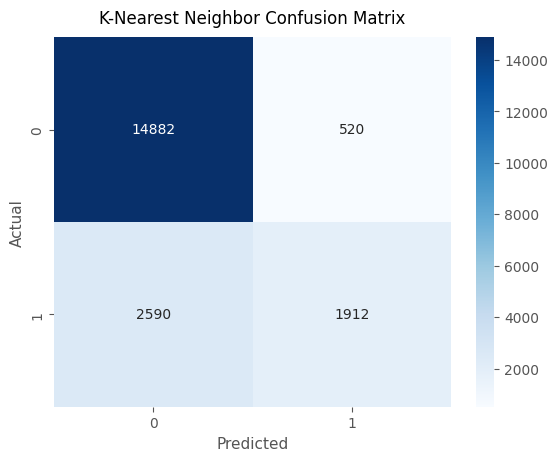

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
axes = sns.heatmap(cf_matrix, annot=True,
            fmt='', cmap='Blues')

axes.set_xlabel('Predicted', fontsize=11)
axes.set_ylabel('Actual', fontsize=11)
axes.set_title('K-Nearest Neighbor Confusion Matrix', fontsize=12, pad=10)

In [ ]:
print('K-Nearest Neighbor Classification Report')
print('=========================')
print()
print(classification_report(y_test, y_pred, target_names=class_labels))

K-Nearest Neighbor Classification Report

              precision    recall  f1-score   support

    Not Rain       0.85      0.97      0.91     15402
        Rain       0.79      0.42      0.55      4502

    accuracy                           0.84     19904
   macro avg       0.82      0.70      0.73     19904
weighted avg       0.84      0.84      0.83     19904



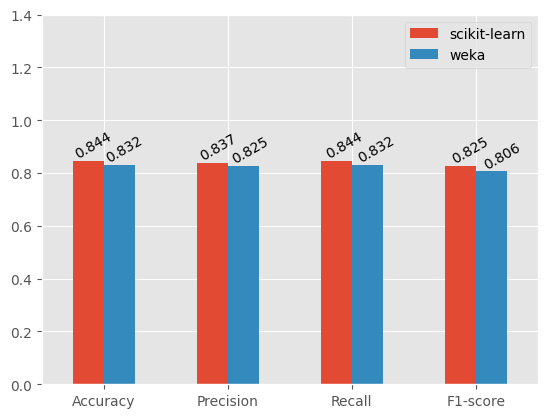

In [ ]:
weka_knn_accuracy=0.832
weka_knn_precision=0.825
weka_knn_recall=0.832
weka_knn_f1_score=0.806

knn_dict = {
    'scikit-learn': {'Accuracy': knn_accuracy, 'Precision': knn_precision, 'Recall': knn_recall, 'F1-score': knn_f1_score},
    'weka': {'Accuracy': weka_knn_accuracy, 'Precision':  weka_knn_precision, 'Recall': weka_knn_recall, 'F1-score': weka_knn_f1_score},
}

ax = pd.DataFrame(knn_dict).plot(kind='bar', rot=0)
ax.set_ylim((0, 1.4))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() * 1.015), ha='left', rotation=30)
plt.show()

**4.2. Logistic Regression**

In [ ]:
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

In [ ]:
log_reg_accuracy = round(accuracy_score(y_test, y_pred),3)
log_reg_precision = round(precision_score(y_test, y_pred, average='weighted'),3)
log_reg_recall = round(recall_score(y_test, y_pred, average='weighted'),3)
log_reg_f1_score = round(f1_score(y_test, y_pred, average='weighted'),3)

print("The classification accuracy of Logistic Regression model is: "+ str(log_reg_accuracy))
print("The classification precision of Logistic Regression model is: "+ str(log_reg_precision))
print("The classification recall of Logistic Regression model is: "+ str(log_reg_recall))
print("The classification f1-score of Logistic Regression model is: "+ str(log_reg_f1_score))

The classification accuracy of Logistic Regression model is: 0.838
The classification precision of Logistic Regression model is: 0.827
The classification recall of Logistic Regression model is: 0.838
The classification f1-score of Logistic Regression model is: 0.824


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

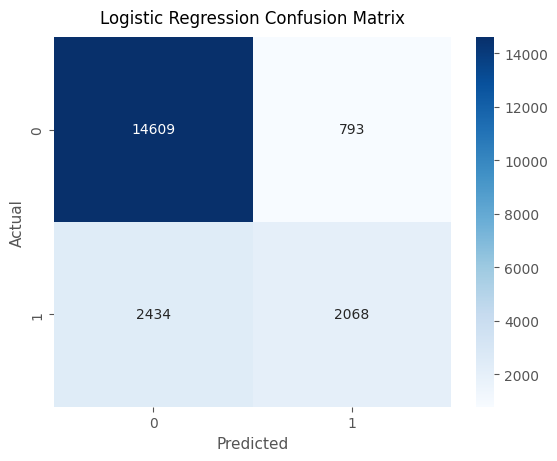

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
axes = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')

axes.set_xlabel('Predicted', fontsize=11)
axes.set_ylabel('Actual', fontsize=11)
axes.set_title('Logistic Regression Confusion Matrix', fontsize=12, pad=10)

In [ ]:
print('Logistic Regression Classification Report')
print('=====================================================')
print()
print(classification_report(y_test, y_pred, target_names=class_labels))

Logistic Regression Classification Report

              precision    recall  f1-score   support

    Not Rain       0.86      0.95      0.90     15402
        Rain       0.72      0.46      0.56      4502

    accuracy                           0.84     19904
   macro avg       0.79      0.70      0.73     19904
weighted avg       0.83      0.84      0.82     19904



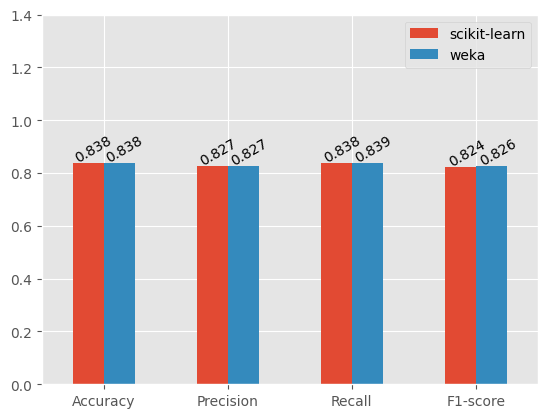

In [ ]:
weka_logreg_accuracy = 0.838
weka_log_reg_precision = 0.827
weka_log_reg_recall = 0.839
weka_log_reg_f1_score = 0.826

log_reg_dict = {'Accuracy' : log_reg_accuracy,
                'Precision' : log_reg_precision,
                'Recall' : log_reg_recall,
                'f1' : log_reg_f1_score}


log_reg_dict = {
    'scikit-learn': {'Accuracy': log_reg_accuracy, 'Precision': log_reg_precision, 'Recall': log_reg_recall, 'F1-score': log_reg_f1_score},
    'weka': {'Accuracy': weka_logreg_accuracy, 'Precision': weka_log_reg_precision, 'Recall': weka_log_reg_recall, 'F1-score': weka_log_reg_f1_score},
}

ax = pd.DataFrame(log_reg_dict).plot(kind='bar', rot=0)
ax.set_ylim((0, 1.4))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), ha='left', rotation=30)
plt.show()


**4.3 Decision Trees**

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.0001)
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)

In [ ]:
dtree_accuracy = round(accuracy_score(y_test, y_pred),3)
dtree_precision = round(precision_score(y_test, y_pred, average='weighted'),3)
dtree_recall = round(recall_score(y_test, y_pred, average='weighted'),3)
dtree_f1_score = round(f1_score(y_test, y_pred, average='weighted'),3)

print("The classification accuracy of Decision Tree model is: "+ str(dtree_accuracy))
print("The classification precision of Decision Tree model is: "+ str(dtree_precision))
print("The classification recall of Decision Tree model is: "+ str(dtree_recall))
print("The classification f1-score of Decision Tree model is: "+ str(dtree_f1_score))

The classification accuracy of Decision Tree model is: 0.84
The classification precision of Decision Tree model is: 0.83
The classification recall of Decision Tree model is: 0.84
The classification f1-score of Decision Tree model is: 0.83


Text(0.5, 1.0, 'Decision Trees Confusion Matrix')

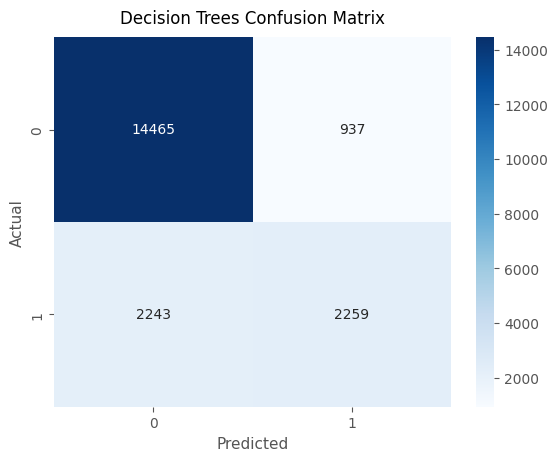

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
axes = sns.heatmap(cf_matrix, annot=True,
            fmt='', cmap='Blues')

axes.set_xlabel('Predicted', fontsize=11)
axes.set_ylabel('Actual', fontsize=11)
axes.set_title('Decision Trees Confusion Matrix', fontsize=12, pad=10)

In [ ]:
print('Decision Tree Classification Report')
print('======================================================')
print()
print(classification_report(y_test, y_pred, target_names=class_labels))

Decision Tree Classification Report

              precision    recall  f1-score   support

    Not Rain       0.87      0.94      0.90     15402
        Rain       0.71      0.50      0.59      4502

    accuracy                           0.84     19904
   macro avg       0.79      0.72      0.74     19904
weighted avg       0.83      0.84      0.83     19904



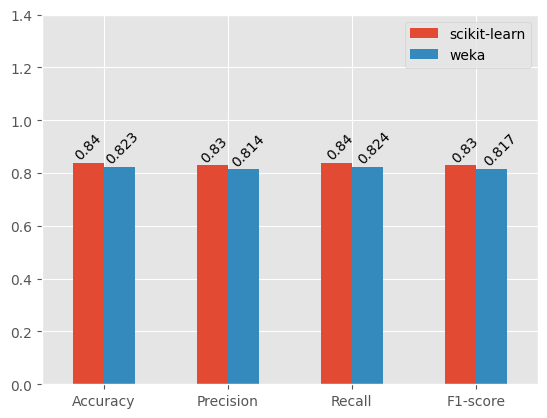

In [ ]:
weka_dtree_accuracy = 0.823
weka_dtree_precision = 0.814
weka_dtree_recall = 0.824
weka_dtree_f1_score = 0.817

dtree_dict = {
    'scikit-learn': {'Accuracy': dtree_accuracy, 'Precision': dtree_precision, 'Recall': dtree_recall, 'F1-score': dtree_f1_score},
    'weka': {'Accuracy': weka_dtree_accuracy, 'Precision':weka_dtree_precision, 'Recall': weka_dtree_recall, 'F1-score': weka_dtree_f1_score},
}

ax = pd.DataFrame(dtree_dict).plot(kind='bar', rot=0)
ax.set_ylim((0, 1.4))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() * 1.015), ha='left', rotation=45)
plt.show()

**4.4 Random Forest**

In [ ]:
rforest = RandomForestClassifier(criterion='gini')
rforest = rforest.fit(x_train, y_train)
y_pred = rforest.predict(x_test)

In [ ]:
rforest_accuracy = round(accuracy_score(y_test, y_pred),3)
rforest_precision = round(precision_score(y_test, y_pred, average='weighted'),3)
rforest_recall = round(recall_score(y_test, y_pred, average='weighted'),3)
rforest_f1_score = round(f1_score(y_test, y_pred, average='weighted'),3)

print("The classification accuracy of Random Forest model is: "+ str(rforest_accuracy))
print("The classification precision of Random Forest model is: "+ str(rforest_precision))
print("The classification recall of Random Forest model is: "+ str(rforest_recall))
print("The classification f1-score of Random Forest model is: "+ str(rforest_f1_score))

The classification accuracy of Random Forest model is: 0.852
The classification precision of Random Forest model is: 0.844
The classification recall of Random Forest model is: 0.852
The classification f1-score of Random Forest model is: 0.841


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

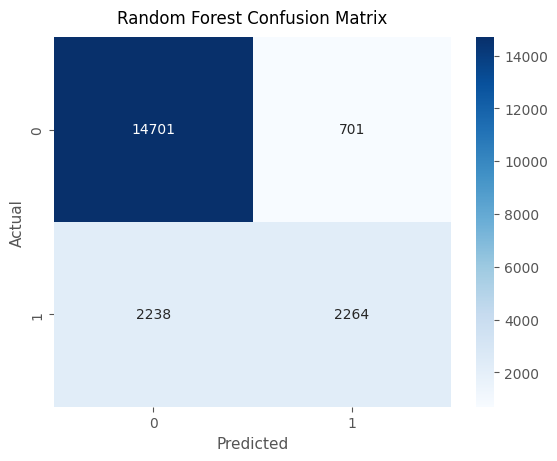

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
axes = sns.heatmap(cf_matrix, annot=True,
            fmt='', cmap='Blues')

axes.set_xlabel('Predicted', fontsize=11)
axes.set_ylabel('Actual', fontsize=11)
axes.set_title('Random Forest Confusion Matrix', fontsize=12, pad=10)

In [ ]:
print('Random Forest Classification Report')
print('=====================================================')
print()
print(classification_report(y_test, y_pred, target_names=class_labels))

Random Forest Classification Report

              precision    recall  f1-score   support

    Not Rain       0.87      0.95      0.91     15402
        Rain       0.76      0.50      0.61      4502

    accuracy                           0.85     19904
   macro avg       0.82      0.73      0.76     19904
weighted avg       0.84      0.85      0.84     19904



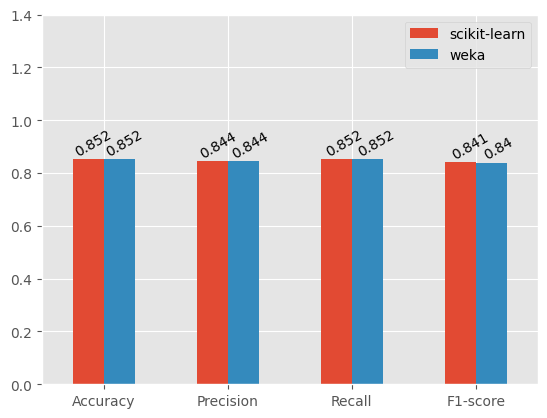

In [ ]:
weka_rforest_accuracy = 0.852
weka_rforest_precision = 0.844
weka_rforest_recall = 0.852
weka_rforest_f1_score = 0.840

rforest_dict = {
    'scikit-learn': {'Accuracy': rforest_accuracy, 'Precision': rforest_precision, 'Recall': rforest_recall, 'F1-score': rforest_f1_score},
    'weka': {'Accuracy': weka_rforest_accuracy, 'Precision': weka_rforest_precision, 'Recall': weka_rforest_recall, 'F1-score': weka_rforest_f1_score},
}


ax = pd.DataFrame(rforest_dict).plot(kind='bar', rot=0)
ax.set_ylim((0, 1.4))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() * 1.015), ha='left', rotation=30)
plt.show()



**4.5 AdaBoost**

In [ ]:
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                         algorithm='SAMME')
adaboost.fit(x_train, y_train)
y_pred = adaboost.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
adaboost_accuracy = round(accuracy_score(y_test, y_pred),3)
adaboost_precision = round(precision_score(y_test, y_pred, average='weighted'),3)
adaboost_recall = round(recall_score(y_test, y_pred, average='weighted'),3)
adaboost_f1_score = round(f1_score(y_test, y_pred, average='weighted'),3)

print("The classification accuracy of AdaBoost model is: "+ str(adaboost_accuracy))
print("The classification precision of AdaBoost model is: "+ str(adaboost_precision))
print("The classification recall of AdaBoost model is: "+ str(adaboost_recall))
print("The classification f1-score of AdaBoost model is: "+ str(adaboost_f1_score))

The classification accuracy of AdaBoost model is: 0.836
The classification precision of AdaBoost model is: 0.824
The classification recall of AdaBoost model is: 0.836
The classification f1-score of AdaBoost model is: 0.823


Text(0.5, 1.0, 'AdaBoost Confusion Matrix')

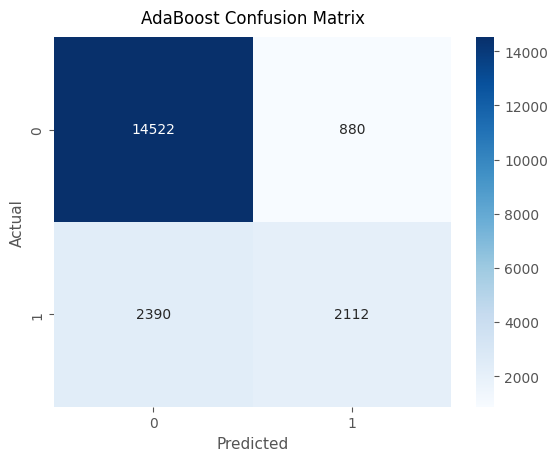

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
axes = sns.heatmap(cf_matrix, annot=True,
            fmt='', cmap='Blues')

axes.set_xlabel('Predicted', fontsize=11)
axes.set_ylabel('Actual', fontsize=11)
axes.set_title('AdaBoost Confusion Matrix', fontsize=12, pad=10)

In [ ]:
print('AdaBoost Classification Report')
print('======================================================')
print()
print(classification_report(y_test, y_pred, target_names=class_labels))

AdaBoost Classification Report

              precision    recall  f1-score   support

    Not Rain       0.86      0.94      0.90     15402
        Rain       0.71      0.47      0.56      4502

    accuracy                           0.84     19904
   macro avg       0.78      0.71      0.73     19904
weighted avg       0.82      0.84      0.82     19904



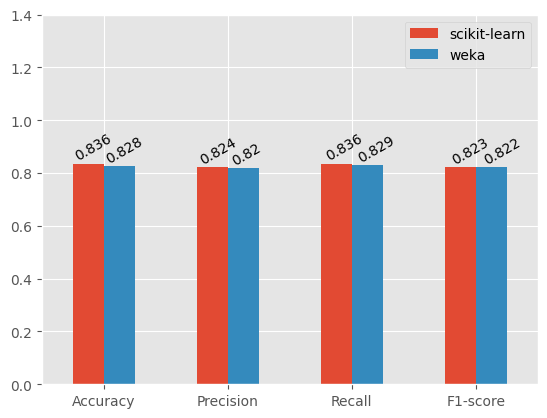

In [ ]:
weka_adaboost_accuracy = 0.828
weka_adaboost_precision = 0.820
weka_adaboost_recall = 0.829
weka_adaboost_f1_score = 0.822

adaboost_dict = {
    'scikit-learn': {'Accuracy': adaboost_accuracy, 'Precision': adaboost_precision, 'Recall': adaboost_recall, 'F1-score': adaboost_f1_score},
    'weka': {'Accuracy': weka_adaboost_accuracy, 'Precision': weka_adaboost_precision, 'Recall': weka_adaboost_recall, 'F1-score': weka_adaboost_f1_score}
}


ax = pd.DataFrame(adaboost_dict).plot(kind='bar', rot=0)
ax.set_ylim((0, 1.4))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() * 1.015), ha='left', rotation=30)
plt.show()

**4.6 Naive Bayes**

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
y_pred = naive_bayes.predict(x_test)

In [ ]:
naive_bayes_accuracy = round(accuracy_score(y_test, y_pred),3)
naive_bayes_precision = round(precision_score(y_test, y_pred, average='weighted'),3)
naive_bayes_recall = round(recall_score(y_test, y_pred, average='weighted'),3)
naive_bayes_f1_score = round(f1_score(y_test, y_pred, average='weighted'),3)

print("The classification accuracy of Naive Bayes model is: "+ str(naive_bayes_accuracy))
print("The classification precision of Naive Bayes model is: "+ str(naive_bayes_precision))
print("The classification recall of Naive Bayes model is: "+ str(naive_bayes_recall))
print("The classification f1-score of Naive Bayes model is: "+ str(naive_bayes_f1_score))

The classification accuracy of Naive Bayes model is: 0.805
The classification precision of Naive Bayes model is: 0.799
The classification recall of Naive Bayes model is: 0.805
The classification f1-score of Naive Bayes model is: 0.802


Text(0.5, 1.0, 'Naive Bayes Confusion Matrix')

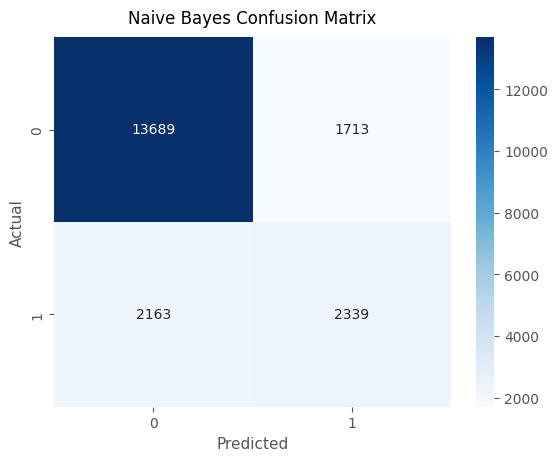

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
axes = sns.heatmap(cf_matrix, annot=True,
            fmt='', cmap='Blues')

axes.set_xlabel('Predicted', fontsize=11)
axes.set_ylabel('Actual', fontsize=11)
axes.set_title('Naive Bayes Confusion Matrix', fontsize=12, pad=10)

In [ ]:
print('Naive Bayes Classification Report')
print('==============================')
print()
print(classification_report(y_test, y_pred, target_names=class_labels))

Naive Bayes Classification Report

              precision    recall  f1-score   support

    Not Rain       0.86      0.89      0.88     15402
        Rain       0.58      0.52      0.55      4502

    accuracy                           0.81     19904
   macro avg       0.72      0.70      0.71     19904
weighted avg       0.80      0.81      0.80     19904



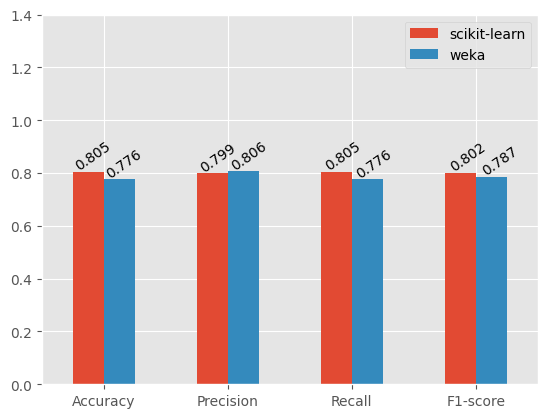

In [ ]:
weka_naive_bayes_accuracy = 0.776
weka_naive_bayes_precision = 0.806
weka_naive_bayes_recall = 0.776
weka_naive_bayes_f1_score = 0.787

naive_bayes_dict = {
    'scikit-learn': {'Accuracy': naive_bayes_accuracy, 'Precision': naive_bayes_precision, 'Recall': naive_bayes_recall, 'F1-score': naive_bayes_f1_score},
    'weka': {'Accuracy': weka_naive_bayes_accuracy, 'Precision': weka_naive_bayes_precision , 'Recall': weka_naive_bayes_recall, 'F1-score': weka_naive_bayes_f1_score},
}

ax = pd.DataFrame(naive_bayes_dict).plot(kind='bar', rot=0)
ax.set_ylim((0, 1.4))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.010, p.get_height() * 1.010), ha='left', rotation=35)

plt.show()

**4.7 Support Vector Machines**

In [ ]:
svm_clf = svm.SVC(kernel='poly', C=1.0)
svm_clf.fit(x_train, y_train)
y_pred = svm_clf.predict(x_test)

In [ ]:
svm_accuracy = round(accuracy_score(y_test, y_pred),3)
svm_precision = round(precision_score(y_test, y_pred, average='weighted'),3)
svm_recall = round(recall_score(y_test, y_pred, average='weighted'),3)
svm_f1_score = round(f1_score(y_test, y_pred, average='weighted'),3)

print("The classification accuracy of Support Vector Machines model is: "+ str(svm_accuracy))
print("The classification precision of Support Vector Machines model is: "+ str(svm_precision))
print("The classification recall of Support Vector Machines model is: "+ str(svm_recall))
print("The classification f1-score of Support Vector Machines model is: "+ str(svm_f1_score))

The classification accuracy of Support Vector Machines model is: 0.835
The classification precision of Support Vector Machines model is: 0.826
The classification recall of Support Vector Machines model is: 0.835
The classification f1-score of Support Vector Machines model is: 0.814


Text(0.5, 1.0, 'Support Vector Machines Confusion Matrix')

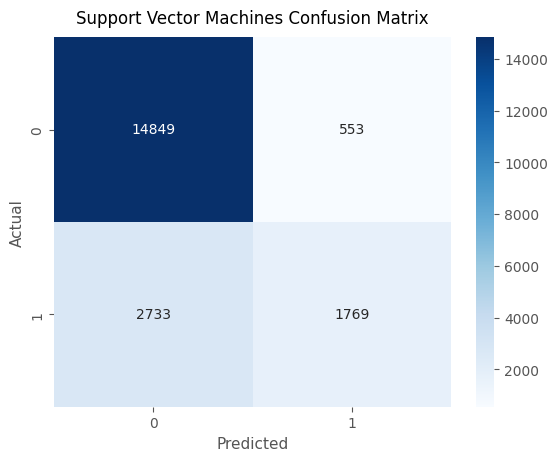

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
axes = sns.heatmap(cf_matrix, annot=True,
            fmt='', cmap='Blues')

axes.set_xlabel('Predicted', fontsize=11)
axes.set_ylabel('Actual', fontsize=11)
axes.set_title('Support Vector Machines Confusion Matrix', fontsize=12, pad=10)

In [ ]:
print('Support Vector Machines Classification Report')
print('=========================')
print()
print(classification_report(y_test, y_pred, target_names=class_labels))

Support Vector Machines Classification Report

              precision    recall  f1-score   support

    Not Rain       0.84      0.96      0.90     15402
        Rain       0.76      0.39      0.52      4502

    accuracy                           0.83     19904
   macro avg       0.80      0.68      0.71     19904
weighted avg       0.83      0.83      0.81     19904



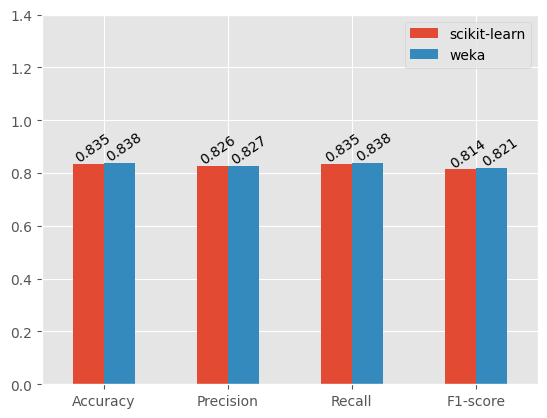

In [ ]:
weka_svm_accuracy=0.838
weka_svm_precision=0.827
weka_svm_recall=0.838
weka_f1_score=0.821

svm_dict = {
    'scikit-learn': {'Accuracy': svm_accuracy, 'Precision': svm_precision, 'Recall': svm_recall, 'F1-score': svm_f1_score},
    'weka': {'Accuracy': weka_svm_accuracy, 'Precision': weka_svm_precision , 'Recall': weka_svm_recall, 'F1-score': weka_f1_score},
}

ax = pd.DataFrame(svm_dict).plot(kind='bar', rot=0)
ax.set_ylim((0, 1.4))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.010, p.get_height() * 1.010), ha='left', rotation=35)

plt.show()


**4.8 Multi-Layer Perceptron**

In [ ]:
MLPerceptron = MLPClassifier(solver='sgd', activation='logistic', learning_rate_init=0.0001)
MLPerceptron.fit(x_train, y_train)
y_pred = MLPerceptron.predict(x_test)

In [ ]:
mlp_accuracy = round(accuracy_score(y_test, y_pred),3)
mlp_precision = round(precision_score(y_test, y_pred, average='weighted'),3)
mlp_recall = round(recall_score(y_test, y_pred, average='weighted'),3)
mlp_f1_score = round(f1_score(y_test, y_pred, average='weighted'),3)

print("The classification accuracy of Multi-Layer Perceptron model is: "+ str(mlp_accuracy))
print("The classification precision of Multi-Layer Perceptron model is: "+ str(mlp_precision))
print("The classification recall of Multi-Layer Perceptron model is: "+ str(mlp_recall))
print("The classification f1-score of Multi-Layer Perceptron model is: "+ str(mlp_f1_score))


The classification accuracy of Multi-Layer Perceptron model is: 0.835
The classification precision of Multi-Layer Perceptron model is: 0.824
The classification recall of Multi-Layer Perceptron model is: 0.835
The classification f1-score of Multi-Layer Perceptron model is: 0.825


Text(0.5, 1.0, 'Multi-Layer Perceptron Confusion Matrix')

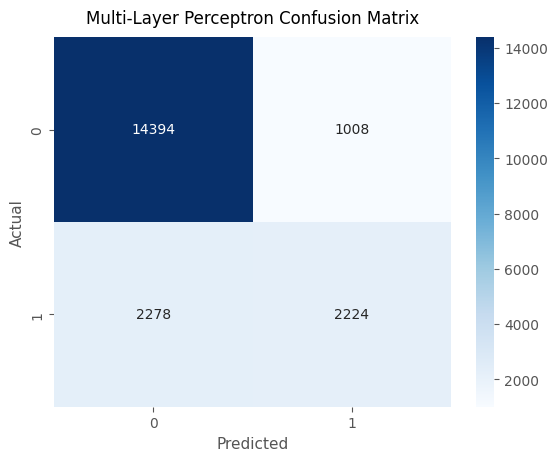

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
axes = sns.heatmap(cf_matrix, annot=True,
            fmt='', cmap='Blues')

axes.set_xlabel('Predicted', fontsize=11)
axes.set_ylabel('Actual', fontsize=11)
axes.set_title('Multi-Layer Perceptron Confusion Matrix', fontsize=12, pad=10)

In [ ]:
print('Multi-Layer Perceptron Classification Report')
print('======================================================')
print()
print(classification_report(y_test, y_pred, target_names=class_labels))

Multi-Layer Perceptron Classification Report

              precision    recall  f1-score   support

    Not Rain       0.86      0.93      0.90     15402
        Rain       0.69      0.49      0.58      4502

    accuracy                           0.83     19904
   macro avg       0.78      0.71      0.74     19904
weighted avg       0.82      0.83      0.82     19904



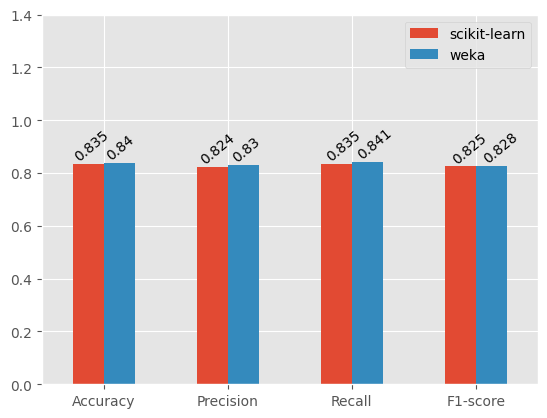

In [ ]:
weka_mlp_accuracy = 0.840
weka_mlp_precision = 0.830
weka_mlp_recall=0.841
weka_mlp_f1_score=0.828

mlp_dict = {
    'scikit-learn': {'Accuracy': mlp_accuracy, 'Precision': mlp_precision, 'Recall': mlp_recall, 'F1-score': mlp_f1_score},
    'weka': {'Accuracy': weka_mlp_accuracy, 'Precision': weka_mlp_precision, 'Recall': weka_mlp_recall, 'F1-score': weka_mlp_f1_score}
}

ax = pd.DataFrame(mlp_dict).plot(kind='bar', rot=0)
ax.set_ylim((0, 1.4))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() * 1.015), ha='left', rotation=40)
plt.show()

**5. Αξιολόγιση της Απόδοσης των Μοντέλων**

---




**5.1 Οθότητα (Accuracy)**

========== Accuracy ==========

WEKA: [('Naive Bayes', 0.776), ('Decision Tree', 0.823), ('AdaBoost', 0.828), ('K-Nearest Neighbors', 0.832), ('Logistic Regression', 0.838), ('Support Vector Machines', 0.838), ('Multi-Layer Perceptron', 0.84), ('Random Forest', 0.852)]
Scikit-learn: [('Naive Bayes', 0.805), ('Support Vector Machines', 0.835), ('Multi-Layer Perceptron', 0.835), ('AdaBoost', 0.836), ('Logistic Regression', 0.838), ('Decision Tree', 0.84), ('K-Nearest Neighbors', 0.844), ('Random Forest', 0.851)]




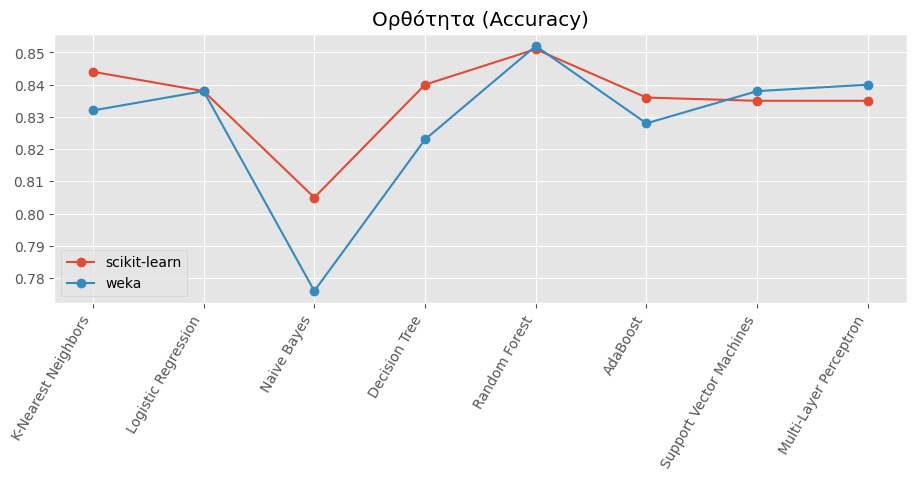

In [ ]:
sklearn_accuracy_dict = {'K-Nearest Neighbors' : knn_accuracy,
                 'Logistic Regression' : log_reg_accuracy,
                 'Naive Bayes' : naive_bayes_accuracy,
                 'Decision Tree' : dtree_accuracy,
                 'Random Forest' : rforest_accuracy,
                 'AdaBoost' : adaboost_accuracy,
                 'Support Vector Machines' : svm_accuracy,
                 'Multi-Layer Perceptron' : mlp_accuracy}

weka_accuracy_dict = {'K-Nearest Neighbors' : weka_knn_accuracy,
                 'Logistic Regression' : weka_logreg_accuracy, #na diorthoso
                 'Naive Bayes' : weka_naive_bayes_accuracy,
                 'Decision Tree' : weka_dtree_accuracy,
                 'Random Forest' : weka_rforest_accuracy,
                 'AdaBoost' : weka_adaboost_accuracy,
                 'Support Vector Machines' : weka_svm_accuracy,
                 'Multi-Layer Perceptron' : weka_mlp_accuracy}

sklearn_accuracy_list = list(sklearn_accuracy_dict.values())
weka_accuracy_list = list(weka_accuracy_dict.values())

print('========== Accuracy ==========\n')
print('WEKA:', sorted(weka_accuracy_dict.items(), key=lambda x:x[1]))
print('Scikit-learn:', sorted(sklearn_accuracy_dict.items(), key=lambda x:x[1]))
print('\n')

plt.figure(figsize=(11,3.5))
xLabels = list(sklearn_accuracy_dict.keys())
plt.plot(xLabels, sklearn_accuracy_list, '-o', label='scikit-learn')
plt.plot(xLabels, weka_accuracy_list, '-o', label='weka')
plt.legend()
plt.title('Ορθότητα (Accuracy)')

plt.xticks(rotation=60, ha = "right")
plt.show()

**Παρατηρήσεις:** Παρατηρούμε ότι όλοι οι ταξινομητές (classifiers) παρουσιάζουν σχετικά υψηλή ορθότητα (accuracy) τόσο στο Scikit-learn όσο και στο WEKA. O κατηγοριοποιητής Random Forest ήταν αυτός που παρουσίασε την μεγαλύτερη ορθότητα (accuracy) και στα δυο από αυτά. Συμφωνα με την μαθηματική εκφραση που δίνει την ορθότητα όσο λιγότερες είναι οι συνολικές ψευδές προβλέψεις του κατηγοριοποιητή τόσο μεγαλύτερη ορθότητα παρουσιάζει. Τόσο στο WEKA όσο και στο Scikit-learn ο αριθμός αυτός είναι μικρότερος συγκριτικά με τους υπόλοιπους κατηγοριοποιητές γι’ αυτό και το μοντέλο παρουσιάζει τη μεγαλύτερη ορθότητα.

**5.2 Ακρίβεια (Precision)**

========== Precision ==========

WEKA: [('Naive Bayes', 0.806), ('Decision Tree', 0.814), ('AdaBoost', 0.82), ('K-Nearest Neighbors', 0.825), ('Logistic Regression', 0.827), ('Support Vector Machines', 0.827), ('Multi-Layer Perceptron', 0.83), ('Random Forest', 0.844)]
Scikit-learn: [('Naive Bayes', 0.799), ('AdaBoost', 0.824), ('Multi-Layer Perceptron', 0.825), ('Support Vector Machines', 0.826), ('Logistic Regression', 0.827), ('Decision Tree', 0.83), ('K-Nearest Neighbors', 0.837), ('Random Forest', 0.843)]




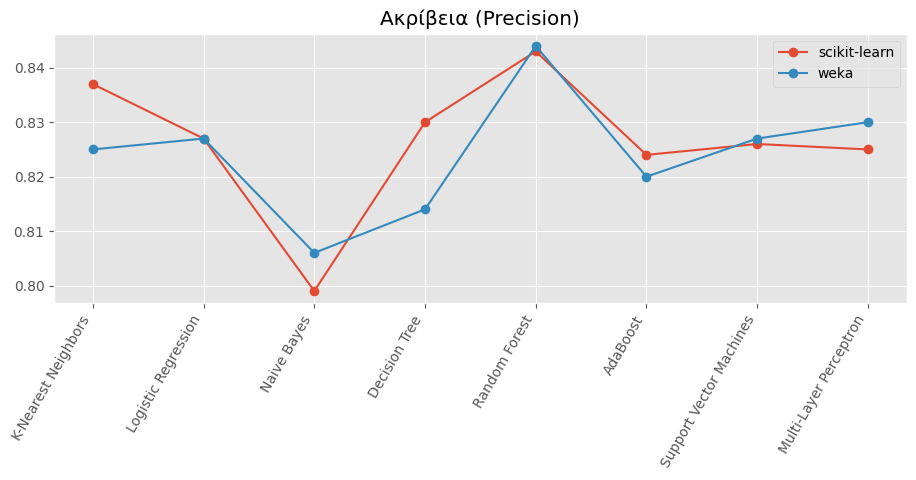

In [ ]:
sklearn_precision_dict = {'K-Nearest Neighbors' : knn_precision,
                 'Logistic Regression' : log_reg_precision,
                 'Naive Bayes' : naive_bayes_precision,
                 'Decision Tree' : dtree_precision,
                 'Random Forest' : rforest_precision,
                 'AdaBoost' : adaboost_precision,
                 'Support Vector Machines' : svm_precision,
                 'Multi-Layer Perceptron' : mlp_precision}


weka_precision_dict = {'K-Nearest Neighbors' : weka_knn_precision,
                 'Logistic Regression' : weka_log_reg_precision,
                 'Naive Bayes' : weka_naive_bayes_precision,
                 'Decision Tree' : weka_dtree_precision,
                 'Random Forest' : weka_rforest_precision,
                 'AdaBoost' : weka_adaboost_precision,
                 'Support Vector Machines' : weka_svm_precision,
                 'Multi-Layer Perceptron' : weka_mlp_precision}


sklearn_precision_list = list(sklearn_precision_dict.values())
weka_precision_list = list(weka_precision_dict.values())

print('========== Precision ==========\n')
print('WEKA:', sorted(weka_precision_dict.items(), key=lambda x:x[1]))
print('Scikit-learn:', sorted(sklearn_precision_dict.items(), key=lambda x:x[1]))
print('\n')

plt.figure(figsize=(11,3.5))
xLabels = list(sklearn_precision_dict.keys())
plt.plot(xLabels, sklearn_precision_list, '-o', label='scikit-learn')
plt.plot(xLabels, weka_precision_list, '-o', label='weka')
plt.legend()
plt.title('Ακρίβεια (Precision)')
plt.xticks(rotation=60, ha = "right")
plt.show()


**Παρατηρήσεις:** Παραπάνω παρατηρείται ότι όλοι οι ταξινομητές (classifiers) παρουσιάζουν σχετικά υψηλή ακρίβεια (precision). Ο ταξινομητής Random Forest όπως βλέπουμε και σε αυτή τη μετρική παρουσιάζει τη μεγαλύτερη τη μεγαλύτερη (ακρίβεια) σε σύγκριση με τους υπολοίπους. Και εδώ αυτό οφείλεται στη μαθηματική εξίσωση που ορίζει την ακρίβεια (precision). Συμφωνα με την εξίσωση αυτή όσο λιγότερες ψευδείς θετικές προβλέψεις (FP) κάνει το μοντέλο τόσο μεγαλύτερη είναι και η σχετική ακρίβεια του. O κατηγοριοποιητής αυτός παρουσιάζει λιγότερες ψευδείς θετικές προβλέψεις (FP) σε σύγκριση με τους υπόλοιπους οπότε με βάση τον σχετικό τύπο έχει και την υψηλότερη ακρίβεια.

**5.3 Ανάκληση (Recall)**

========== Recall ==========

WEKA: [('Naive Bayes', 0.776), ('Decision Tree', 0.824), ('AdaBoost', 0.829), ('K-Nearest Neighbors', 0.832), ('Support Vector Machines', 0.838), ('Logistic Regression', 0.839), ('Multi-Layer Perceptron', 0.841), ('Random Forest', 0.852)]
Scikit-learn: [('Naive Bayes', 0.805), ('Support Vector Machines', 0.835), ('Multi-Layer Perceptron', 0.835), ('AdaBoost', 0.836), ('Logistic Regression', 0.838), ('Decision Tree', 0.84), ('K-Nearest Neighbors', 0.844), ('Random Forest', 0.851)]




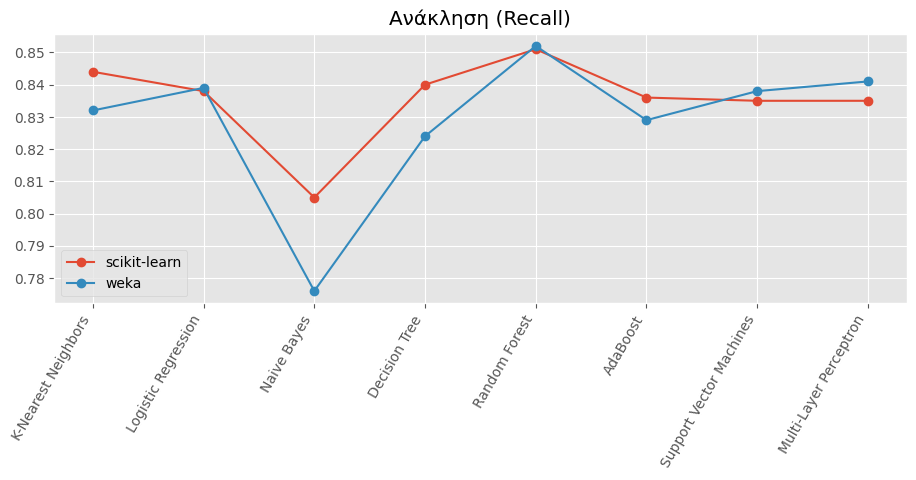

In [ ]:
sklearn_recall_dict = {'K-Nearest Neighbors' : knn_recall,
                 'Logistic Regression' : log_reg_recall,
                 'Naive Bayes' : naive_bayes_recall,
                 'Decision Tree' : dtree_recall,
                 'Random Forest' : rforest_recall,
                 'AdaBoost' : adaboost_recall,
                 'Support Vector Machines' : svm_recall,
                 'Multi-Layer Perceptron' : mlp_recall}


weka_recall_dict = {'K-Nearest Neighbors' : weka_knn_recall,
                 'Logistic Regression' : weka_log_reg_recall,
                 'Naive Bayes' : weka_naive_bayes_recall,
                 'Decision Tree' : weka_dtree_recall,
                 'Random Forest' : weka_rforest_recall,
                 'AdaBoost' : weka_adaboost_recall,
                 'Support Vector Machines' : weka_svm_recall,
                 'Multi-Layer Perceptron' : weka_mlp_recall}


sklearn_recall_list = list(sklearn_recall_dict.values())
weka_recall_list = list(weka_recall_dict.values())

print('========== Recall ==========\n')
print('WEKA:', sorted(weka_recall_dict.items(), key=lambda x:x[1]))
print('Scikit-learn:', sorted(sklearn_recall_dict.items(), key=lambda x:x[1]))
print('\n')

plt.figure(figsize=(11,3.5))
xLabels = list(sklearn_recall_dict.keys())
plt.plot(xLabels, sklearn_recall_list, '-o', label='scikit-learn')
plt.plot(xLabels, weka_recall_list, '-o', label='weka')
plt.legend()
plt.title('Ανάκληση (Recall)')
plt.xticks(rotation=60, ha = "right")
plt.show()

**Παρατηρήσεις:** Παραπάνω παρατηρείται ότι όλοι οι κατηγοριοποιητές (classifiers) παρουσιάζουν υψηλή ανάκληση (recall). Και σε αυτή τη μετρική ο κατηγοριοποιητής Random Forest παρουσιάζει μεγαλύτερη ανάκληση σε σύγκριση με τους υπόλοιπους κατηγοριοποιητές. Αυτό οφείλεται στο γεγονός ότι ο κατηγοριοποιητής αυτός παρουσιάζει λιγότερες ψευδής αρνητικές προβλέψεις (FN: False Negatives) και με βάση την μαθηματική εξίσωση που μας δίνει την ανάκληση όσο μικρότερος είναι ο αριθμός αυτός τόσο μεγαλύτερη είναι η ανάκληση.


**5.4 Αρμονικό Μέσο (F1 - Score)**

========== F1 - Score ==========

WEKA: [('Naive Bayes', 0.787), ('K-Nearest Neighbors', 0.806), ('Decision Tree', 0.817), ('Support Vector Machines', 0.821), ('AdaBoost', 0.822), ('Logistic Regression', 0.826), ('Multi-Layer Perceptron', 0.828), ('Random Forest', 0.84)]
Scikit-learn: [('Naive Bayes', 0.802), ('Support Vector Machines', 0.814), ('Multi-Layer Perceptron', 0.815), ('AdaBoost', 0.823), ('Logistic Regression', 0.824), ('K-Nearest Neighbors', 0.825), ('Decision Tree', 0.83), ('Random Forest', 0.839)]




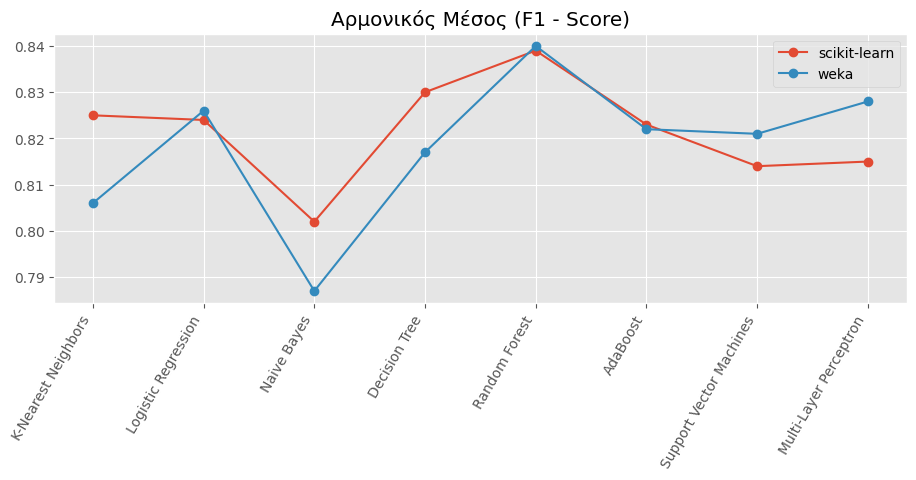

In [ ]:
sklearn_f1_score_dict = {'K-Nearest Neighbors' : knn_f1_score,
                 'Logistic Regression' : log_reg_f1_score,
                 'Naive Bayes' : naive_bayes_f1_score,
                 'Decision Tree' : dtree_f1_score,
                 'Random Forest' : rforest_f1_score,
                 'AdaBoost' : adaboost_f1_score,
                 'Support Vector Machines' : svm_f1_score,
                 'Multi-Layer Perceptron' : mlp_f1_score}


weka_f1_score_dict = {'K-Nearest Neighbors' : weka_knn_f1_score,
                 'Logistic Regression' : weka_log_reg_f1_score,
                 'Naive Bayes' : weka_naive_bayes_f1_score,
                 'Decision Tree' : weka_dtree_f1_score,
                 'Random Forest' : weka_rforest_f1_score,
                 'AdaBoost' : weka_adaboost_f1_score,
                 'Support Vector Machines' : weka_f1_score,
                 'Multi-Layer Perceptron' : weka_mlp_f1_score}

sklearn_f1_score_list = list(sklearn_f1_score_dict.values())
weka_f1_score_list = list(weka_f1_score_dict.values())

print('========== F1 - Score ==========\n')
print('WEKA:', sorted(weka_f1_score_dict.items(), key=lambda x:x[1]))
print('Scikit-learn:', sorted(sklearn_f1_score_dict.items(), key=lambda x:x[1]))
print('\n')

plt.figure(figsize=(11,3.5))
xLabels = list(sklearn_f1_score_dict.keys())
plt.plot(xLabels, sklearn_f1_score_list, '-o', label='scikit-learn')
plt.plot(xLabels, weka_f1_score_list, '-o', label='weka')
plt.legend()
plt.title('Αρμονικός Μέσος (F1 - Score)')
plt.xticks(rotation=60, ha = "right")
plt.show()

**Παρατηρήσεις:** Όλοι οι κατηγοριοποιητές (classifiers) παρουσιάζουν υψηλό αρμονικό μέσο (f1 score). Ο κατηγοριοποιητης RandomForest έχει την υψηλότερο αρμονικό μέσο (f1 score) σε σύγκριση με τους υπόλοιπους κατηγοριοποιητές (classifiers). Αυτό οφείλεται στο γεγονός ότι ο κατηγοριοποιητής παρουσιάζει υψηλότερη ανάκληση και ακρίβεια από τους υπόλοιπους πράγμα που παίζει σημαντικό ρόλο για τον υπολογισμό του αντίστοιχου αρμονικού μέσου σύμφωνα με την αντίστοιχη μαθηματική έκφραση.